# 대한민국 대표 기업 공시 채널 : KIND 에서 주식 데이터를 얻었습니다.
# 간략하게 분석해보겠습니다.
### https://kind.krx.co.kr/main.do?method=loadInitPage&scrnmode=1

In [140]:
import pandas as pd
import numpy as np

stock = pd.read_csv("C:/Users/chemy/Desktop/프3프로젝트/주식발행내역.csv")

In [141]:
stock

,회사명,종목코드,상장(예정)일,상장방식,발행주식수,액면가,발행사유
0,에쓰씨엔지니어링,23960,2021-05-18,추가상장,"23,500",500,스톡옵션행사
1,엠젠플러스,32790,2021-05-18,추가상장,"259,384",500,국내사모 전환사채 전환
2,아이씨디,40910,2021-05-18,추가상장,"20,000",500,주식매수선택권행사
3,젬백스지오,41590,2021-05-18,추가상장,"873,362",500,국내사모 전환사채 전환
4,상지카일룸,42940,2021-05-18,추가상장,"1,706,484",500,국내사모 전환사채 전환
...,...,...,...,...,...,...,...
1220,셀트리온헬스케어,91990,2021-02-18,추가상장,"161,320","1,000",주식매수선택권행사
1221,피엔티,137400,2021-02-18,추가상장,"80,818",500,국내사모 전환사채 전환
1222,알엔투테크놀로지,148250,2021-02-18,추가상장,"63,492",500,국내사모 전환사채 전환
1223,휴벡셀,212310,2021-02-18,추가상장,"294,985",500,유상증자(일반공모)


In [142]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1225 entries, 0 to 1224
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   회사명      1225 non-null   object
 1   종목코드     1225 non-null   int64 
 2   상장(예정)일  1225 non-null   object
 3   상장방식     1225 non-null   object
 4   발행주식수    1225 non-null   object
 5   액면가      1225 non-null   object
 6   발행사유     1225 non-null   object
dtypes: int64(1), object(6)
memory usage: 67.1+ KB


In [143]:
stock.isna().sum()  # 결측치 없습니다.

회사명        0
종목코드       0
상장(예정)일    0
상장방식       0
발행주식수      0
액면가        0
발행사유       0
dtype: int64

In [144]:
stock.describe()  # int형이 종목코드 밖에 없네요...

,종목코드
count,1225.000000
mean,117291.918367
std,116775.302311
min,220.000000
25%,25440.000000
50%,73570.000000
75%,208640.000000
max,950220.000000


In [145]:
stock.describe(include=object) 

,회사명,상장(예정)일,상장방식,발행주식수,액면가,발행사유
count,1225,1225,1225,1225,1225,1225
unique,602,62,3,1034,10,35
top,HMM,2021-04-16,추가상장,0,500,국내사모 전환사채 전환
freq,21,42,1068,71,910,313


### 회사명에 왜 HMM 이 21번이나 나올까요?  >>>  있다가 보겠습니다.

In [146]:
stock.발행사유.nunique()

35

In [147]:
stock.상장방식.nunique()

3

### 1. 발행사유, 상장방식은 category 타입으로 바꿔주겠습니다.

In [148]:
stock.액면가.nunique()

10

In [149]:
stock.발행주식수.nunique()

1034

### 2. 액면가, 발행주식수 는 int 형으로 형변환 시켜주겠습니다.
#### >>> sum 도 구할 것이고, 내림차순 정렬해 줄 꺼니까

In [131]:
stock1 = pd.read_csv("C:/Users/chemy/Desktop/프3프로젝트/주식발행내역.csv", nrows=1500,
                    dtype={
                        '회사명': 'object',
                        '종목코드': np.float32,
                        '상장(예정)일': 'object',
                        '상장방식': 'category',
                        '발행주식수': np.float32,
                        '액면가': np.float32,
                        '발행사유': 'category'
                    })

ValueError: could not convert string to float: '23,500'

In [105]:
stock1 = pd.read_csv("C:/Users/chemy/Desktop/프3프로젝트/주식발행내역.csv", nrows=1500,
                    dtype={
                        '회사명': 'object',
                        '종목코드': 'int64',
                        '상장(예정)일': 'object',
                        '상장방식': 'category',
                        '발행주식수': 'int64',
                        '액면가': 'int64',
                        '발행사유': 'category'
                    })

ValueError: invalid literal for int() with base 10: '23,500'

In [186]:
stock.발행주식수.sum()    # '발행주식수' 도 쉼표를 없애줘야 됩니다.

'23,500259,38420,000873,3621,706,484622,22150,33612,95360,92044,78044,1175,00012,195,72934,141144,50873,77036,01720,00080,000494,5595,737400,9615,636,2274715153,000,00010,07054,000,000-8,499,345-28,332,6436,876,6603,138,01740,492-28,348169,00223,50023,801,74705,909,05255,309305,8108,54411,08634,097953,245144,8572,269,28672,4281,512,859252,1411,076,1371,006,784187,8302,476,189210,0873,195,4881,598,721150,00055,86010,000,0001,522,07010,922328,311772,200616,196787,727346,62016,567360,910-50,767,096117,1501,666,16693,950462,008114,28319,938,160840,336-2,169,17543,73326,109-8,685,568225,2253,00085,98357,3221,260,000433,04824,0008,00012,000,00014,880,94789,988660,853109,328337,45580,00032,894,7362117,11116,35813,60020,5003,000677,208219,1776,000655,02152,000,000122,66288,339127,0371,817,120503,59811,456,2808,45631,50057,14271,297,5921,158,93863,726645,1591,849,2831,758,793100,00038,0053,189,341217,3914,500,0008,000,000326,08625,500400,0005,407,50050,1753,066,2706,142,12019,8914,081,63252,364

In [187]:
stock.액면가.sum()    # 지금  ------ 이런 표시가 되어있는 값들이 보입니다.. 제거해 줍시다.
# 형변환 하기 전에 우선적으로, 

'5005005005005005001,0001,0001,0001,0001,0005001001005005001005005005005005005,0005005005005005005005005001005005005005001001001005005005005005,0005,0005005005005005001,0001,0005005005005001,0005005005005005005005001005005001,0002001,0005005005005005005005005001,0001,0005005005005005005001005005001,0005005005005005005005005005005005005005001005005005005005,0005001005005001005001005001,0001,0005005005005005005,0005005005001005005005001005005005005,0005005001,0005005005005005005005001001005001005001005005005005005005005005005005005001005005005005005005005005005001001001,0005005005005005005005005002,5005001,0005,0005005005005001,0005005005001005002,5001005005001005005005005002005005005005005001005005005001,0001,0005005,0005005001,0005005001,0001005,0005005005005001,0005001005005001001,0005005005005005001005005005005005005005005005,0005005005001005005005001001001001,0005005005005005005001001005005005005005001005005001001005001001,0005005005005005005001,0005005005005001,00050050050050050050

## 정규표현식 이용해서, 특수문자 ,- 를 제거하겠습니다.

In [197]:
stock['발행주식수2'] = stock['발행주식수'].str.replace(pat=r',-', repl=r'', regex=True)

In [198]:
stock['액면가2'] = stock['액면가'].str.replace(pat=r',-', repl=r'', regex=True)

In [203]:
stock

,회사명,종목코드,상장(예정)일,상장방식,발행주식수,액면가,발행사유,발행주식수2,액면가2
0,에쓰씨엔지니어링,23960,2021-05-18,추가상장,"23,500",500,스톡옵션행사,"23,500",500
1,엠젠플러스,32790,2021-05-18,추가상장,"259,384",500,국내사모 전환사채 전환,"259,384",500
2,아이씨디,40910,2021-05-18,추가상장,"20,000",500,주식매수선택권행사,"20,000",500
3,젬백스지오,41590,2021-05-18,추가상장,"873,362",500,국내사모 전환사채 전환,"873,362",500
4,상지카일룸,42940,2021-05-18,추가상장,"1,706,484",500,국내사모 전환사채 전환,"1,706,484",500
...,...,...,...,...,...,...,...,...,...
1220,셀트리온헬스케어,91990,2021-02-18,추가상장,"161,320","1,000",주식매수선택권행사,"161,320","1,000"
1221,피엔티,137400,2021-02-18,추가상장,"80,818",500,국내사모 전환사채 전환,"80,818",500
1222,알엔투테크놀로지,148250,2021-02-18,추가상장,"63,492",500,국내사모 전환사채 전환,"63,492",500
1223,휴벡셀,212310,2021-02-18,추가상장,"294,985",500,유상증자(일반공모),"294,985",500


In [204]:
(
    stock[['발행주식수2', '액면가2']]
    .assign(발행주식수2=stock.발행주식수2.astype(np.int16),
           액면가2=stock.액면가2.astype(np.int16))
    .info(momory_usage='deep')
)

ValueError: invalid literal for int() with base 10: '23,500'

In [161]:
# stock['발행주식수2'] = stock.발행주식수.str.replace(',', '').astype('int64')

In [162]:
# stock['액면가2'] = stock.액면가.str.replace(',', '').astype('float')

In [183]:
new_stock = stock.dropna()
new_stock

,회사명,종목코드,상장(예정)일,상장방식,발행주식수,액면가,발행사유,발행주식수2,액면가2
0,에쓰씨엔지니어링,23960,2021-05-18,추가상장,"23,500",500,스톡옵션행사,"23,500",500
1,엠젠플러스,32790,2021-05-18,추가상장,"259,384",500,국내사모 전환사채 전환,"259,384",500
2,아이씨디,40910,2021-05-18,추가상장,"20,000",500,주식매수선택권행사,"20,000",500
3,젬백스지오,41590,2021-05-18,추가상장,"873,362",500,국내사모 전환사채 전환,"873,362",500
4,상지카일룸,42940,2021-05-18,추가상장,"1,706,484",500,국내사모 전환사채 전환,"1,706,484",500
...,...,...,...,...,...,...,...,...,...
1220,셀트리온헬스케어,91990,2021-02-18,추가상장,"161,320","1,000",주식매수선택권행사,"161,320","1,000"
1221,피엔티,137400,2021-02-18,추가상장,"80,818",500,국내사모 전환사채 전환,"80,818",500
1222,알엔투테크놀로지,148250,2021-02-18,추가상장,"63,492",500,국내사모 전환사채 전환,"63,492",500
1223,휴벡셀,212310,2021-02-18,추가상장,"294,985",500,유상증자(일반공모),"294,985",500


In [184]:
new_stock['발행주식수2'] = new_stock['발행주식수'].str.replace(pat=r',-[^\w]', repl=r'', regex=True)

In [185]:
new_stock['발행주식수2']

0          23,500
1         259,384
2          20,000
3         873,362
4       1,706,484
          ...    
1220      161,320
1221       80,818
1222       63,492
1223      294,985
1224      232,627
Name: 발행주식수2, Length: 1225, dtype: object

### 1. 액면분할을 적게한 주식 (액면가가 높은) 순으로, 시가총액 큰 순으로 보겠습니다.

In [58]:
new_stock.액면가.nunique()

10

In [65]:
new_stock.nlargest(10, '액면가')

TypeError: Column '액면가' has dtype object, cannot use method 'nlargest' with this dtype

In [75]:
allocation = pd.read_csv("C:/Users/chemy/Desktop/프3프로젝트/배당정보.csv")

### 칼럼 명이 이상하죠?

In [76]:
allocation

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,회사명,종목코드,사업연도,결산월,업종,업종별,주식배당,현금배당,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,배당율,(배당기준일),액면가,기말주식수,주당배당금,배당성향,총배당금액,시가배당률
2,3S,060310,2020,03,기계·장비,1.34,-,500,"44,802,511",-,-,-,-
3,3S,060310,2019,03,기계·장비,0.8,-,500,"44,772,143",-,-,-,-
4,3S,060310,2018,03,기계·장비,0.55,-,500,"43,666,242",-,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2997,셀트리온헬스케어,091990,2019,12,유통,0.38,0.05 / (2019-12-31),"1,000","143,928,048",-,-,-,-
2998,셀트리온헬스케어,091990,2018,12,유통,0.34,0.02 / (2018-12-31),"1,000","140,526,549",-,-,-,-
2999,소룩스,290690,2020,12,일반전기전자,0.36,-,100,"8,158,160",50,9.175 *,"407,908,000",0.300
3000,소룩스,290690,2019,12,-,-,-,-,-,-,-,-,-


### xls 파일에서는, 칼럼이 2층이긴한데, 보이긴 보였는데, csv 파일로 변환을 해주니, 칼럼 명에 오류가 생깁니다.
### 그런데, 여기서는, 어떻게 해줄 수 있을까요?

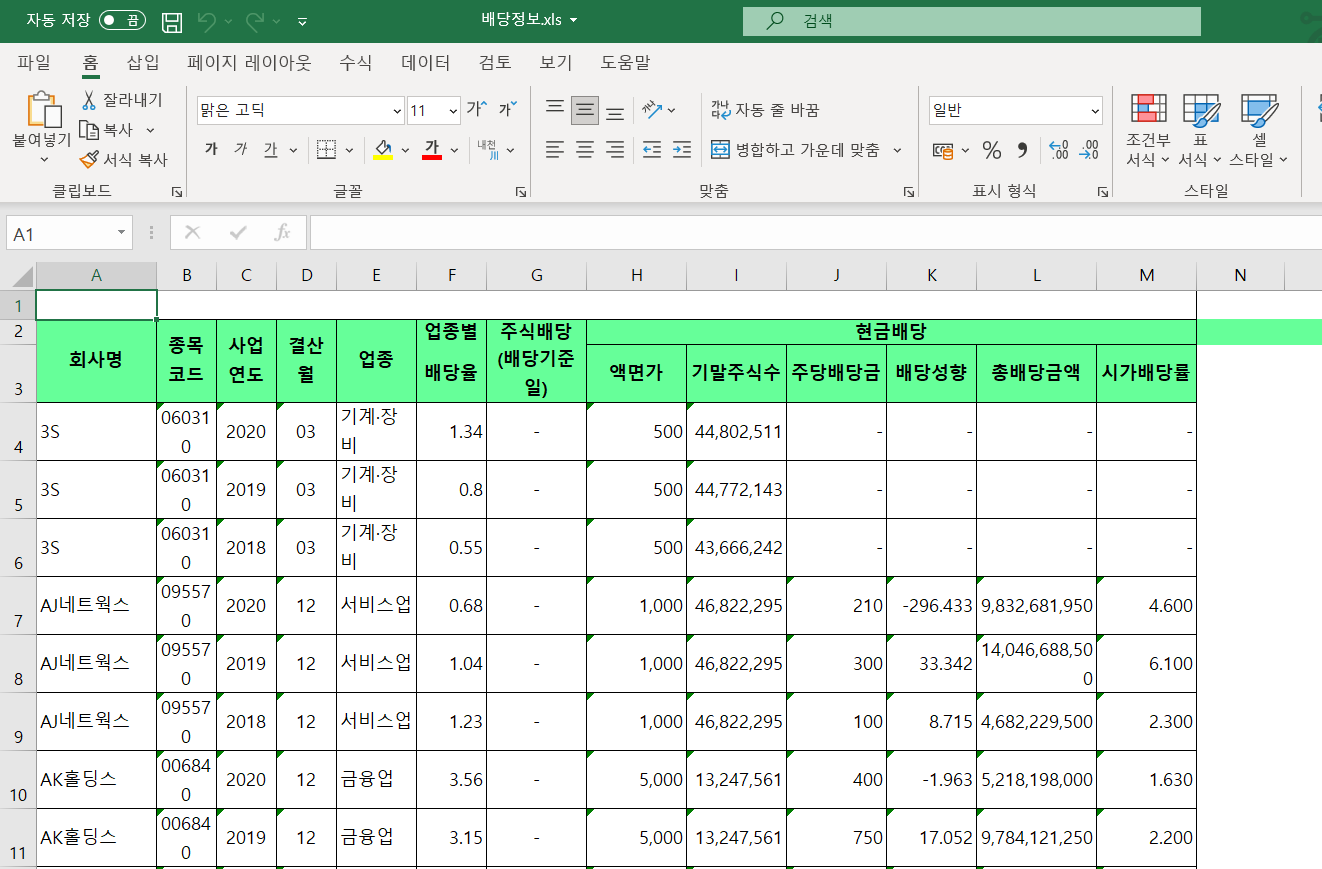

In [42]:
Image("C:/Users/chemy/Desktop/프3프로젝트/1.png")

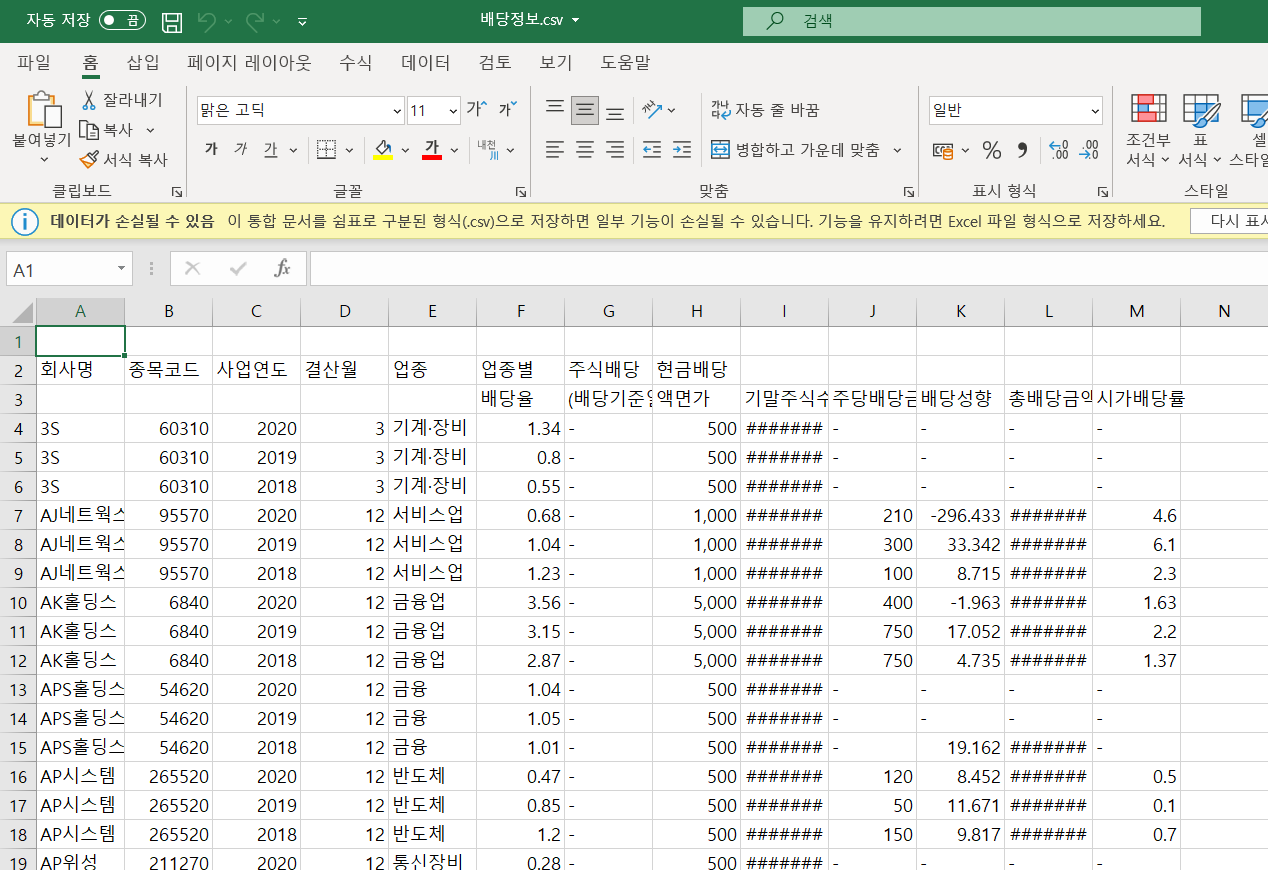

In [43]:
Image("C:/Users/chemy/Desktop/프3프로젝트/2.png")

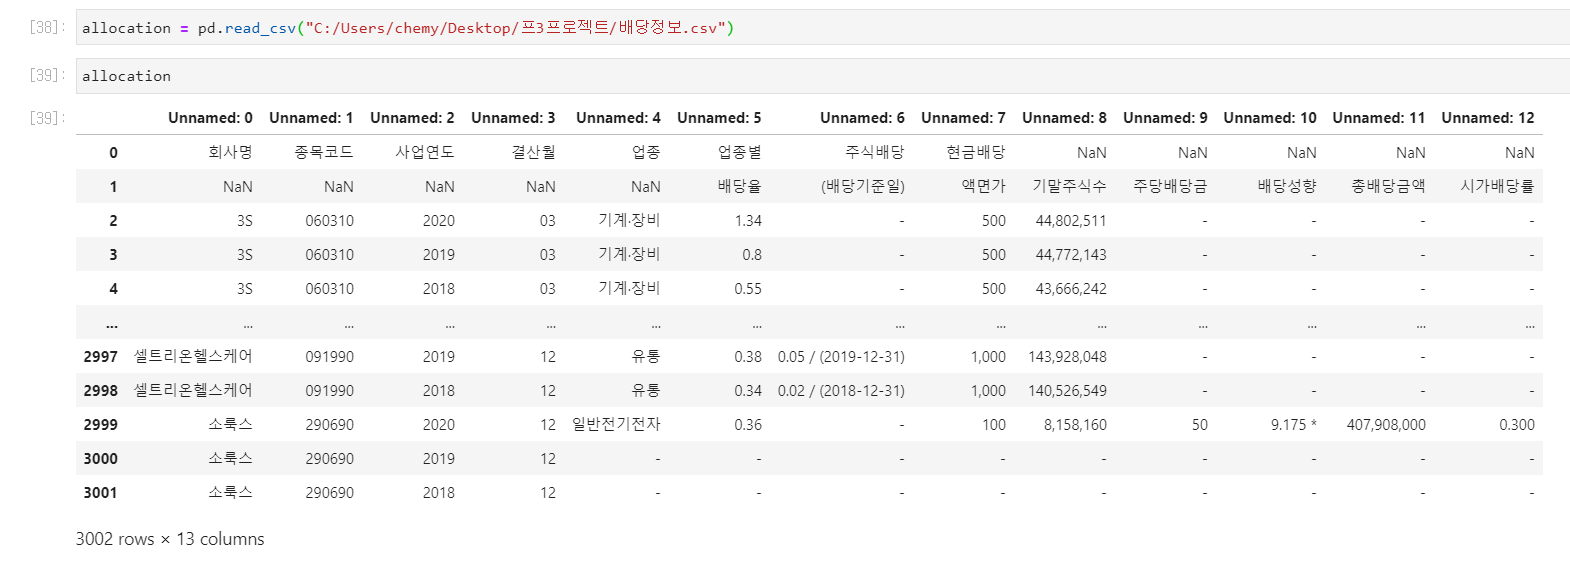

In [44]:
Image("C:/Users/chemy/Desktop/프3프로젝트/3.png")

# 그런데 컬럼 이름이 이상해졌네요. 고쳐봅시다.

# pivot 함수를 이용해봅시다.